
# Private Participation in Infrastructure
### Principal Investigator: Dominique Yuanan Zhao
### Email: yz4360@nyu.edu


This project studies how privatization in emerging economies (BRIC) has evolved with the development of financial institutions overtime. Indexical financial institutional information are taken for Brazil, India, China and Russia from 1994 to 2016 and cross-examined with the privatization of infrastructures in 4 sectors: utilities, energy, transport and Information and Communications Technologies (ICT). 

The outcome of this exercise will compose of the following parts:

1. basic statistical information to reflect 
    * the proportion of private investment in the abovementioned infrastructures, and
    * change in financial development index overtime for each state

2. visualizations 
    * plots for each country showing financial development and total private investments in public infrastructure
    * any interesting changes or anomalies will be annotated and investigated



## Data Report
Overview: The data behind my project comes from [IMF's Financial Development Index](https://data.imf.org/?sk=F8032E80-B36C-43B1-AC26-493C5B1CD33B) and the [World Bank's Private Participation in Infrastructure Database](http://ppi.worldbank.org/customquery) 

Important Variables: The key series extracted from these datasets are Financial Development Index (FDI) and Total Investment in each country by timeseries.

Requisite Packages:

In [268]:
import pandas as pd
from datetime import datetime as dt
import time

import os
import numpy as np

## Section I. Cleaning Data

In [297]:
#read in economic growth data +  privatization data
book = pd.read_excel("/Users/yuanandround/Downloads/customqueryworldbank.xls")
fin_dvlp = pd.read_excel('/Users/yuanandround/Downloads/FDIndex.xlsx')

In [298]:
book.head(5)

,Region,Country,IncomeGroup,IDA Status,Financial closure year,Financial closure Month,Project name,RelatedNames,Type of PPI,Subtype of PPI,...,Sponsors,Main Revenue Source,Other Revenue Source,MultiLateralSupport,BiLateralSupport,TotalDebtFunding,DebtEquityGrantRatio,ProjectBanks,UnsolicitedProposal,PublicDisclosure
0,East Asia and Pacific,Cambodia,Low income,IDA,1995,June,Cambodian Indosat Telecommunication S.A,Camintel,Brownfield,"Rehabilitate, operate, and transfer",...,AZ Communications (Not Available / 49% / Cambo...,Not Applicable,NaN,No,No,NaN,NaN,NaN,Yes,No
1,East Asia and Pacific,Cambodia,Low income,IDA,1995,October,Pochentong International Airport,Phnom Penh International Airport,Brownfield,"Build, rehabilitate, operate, and transfer",...,"Vinci (Not Available / 70% / France), \n\rMuhi...",Not Applicable,NaN,IFC (Loan / $10 Million / 2004),No,NaN,NaN,NaN,Yes,No
2,East Asia and Pacific,Cambodia,Low income,IDA,1995,October,Pochentong International Airport,Phnom Penh International Airport,Brownfield,"Build, rehabilitate, operate, and transfer",...,"Vinci (Not Available / 70% / France), \n\rMuhi...",Not Applicable,NaN,IFC (Loan / $10 Million / 2004),No,NaN,NaN,NaN,Yes,No
3,East Asia and Pacific,Cambodia,Low income,IDA,1997,June,Cambodia Power Company,Phnom Penh Power Plant,Greenfield project,"Build, own, and operate",...,Mosbacher Power Group (Not Available / Not Ava...,Not Applicable,NaN,"IDA (Loan / $.. Million / 1997), \n\rIFC (Loan...",No,NaN,NaN,NaN,Yes,No
4,East Asia and Pacific,Cambodia,Low income,IDA,1997,June,Cambodia Pte Ltd. Power Plant,NaN,Greenfield project,"Build, operate, and transfer",...,Leader Universal Holdings (Not Available / 60%...,Not Applicable,NaN,No,No,NaN,NaN,NaN,Yes,No


In [299]:
book["Country"].nunique()

123

In [300]:
book.columns

Index(['Region', 'Country', 'IncomeGroup', 'IDA Status',
       'Financial closure year', 'Financial closure Month', 'Project name',
       'RelatedNames', 'Type of PPI', 'Subtype of PPI', 'Project status',
       'dateStatusUpdated', 'Primary sector', 'Subsector', 'Segment',
       'Location', 'ContractPeriod', 'GovtGrantingContract',
       'DirectGovtSupport', 'DirectGovtSupportValue', 'InDirectGovtSupport',
       'InDirectGovtSupportValue', 'Total Equity', 'InvestmentYear',
       'PercentPrivate', 'FeesToGovernment', 'PhysicalAssets',
       'TotalInvestment', 'CapacityType', 'Capacity', 'Technology',
       'RelatedProjects', 'BidCriteria', 'AwardMethod', 'NumberOfBids',
       'Sponsors', 'Main Revenue Source', 'Other Revenue Source',
       'MultiLateralSupport', 'BiLateralSupport', 'TotalDebtFunding',
       'DebtEquityGrantRatio', 'ProjectBanks', 'UnsolicitedProposal',
       'PublicDisclosure'],
      dtype='object')

In [301]:
fin_dvlp.columns

Index(['code_id', 'code', 'country', 'year', 'country_group', 'imf_region',
       'FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME'],
      dtype='object')

In [302]:
fin_dvlp.head(5)

,code_id,code,country,year,country_group,imf_region,FD,FI,FM,FID,FIA,FIE,FMD,FMA,FME
0,314,ABW,Aruba,2016,EM,Western Hemisphere,0.296917,0.589506,0.0,0.281724,0.721881,0.679749,0.0,0.0,0.0
1,314,ABW,Aruba,2015,EM,Western Hemisphere,0.294430,0.584570,0.0,0.281724,0.710983,0.677468,0.0,0.0,0.0
2,314,ABW,Aruba,2014,EM,Western Hemisphere,0.297594,0.590852,0.0,0.277979,0.713215,0.700934,0.0,0.0,0.0
3,314,ABW,Aruba,2013,EM,Western Hemisphere,0.293148,0.582024,0.0,0.277828,0.715763,0.667457,0.0,0.0,0.0
4,314,ABW,Aruba,2012,EM,Western Hemisphere,0.293795,0.583309,0.0,0.281382,0.745674,0.627002,0.0,0.0,0.0


In [303]:
fin_dvlp["country"].nunique()

192

In [304]:
book=book[[ 'InvestmentYear','Region','Country', 'Primary sector','TotalInvestment']]

In [305]:
book["Primary sector"].nunique()

4

In [306]:

book["Date"] = pd.to_datetime(book["InvestmentYear"], format='%Y')

book.head(2)

,InvestmentYear,Region,Country,Primary sector,TotalInvestment,Date
0,1995,East Asia and Pacific,Cambodia,Information and communication technology (ICT),1.5,1995-01-01
1,1995,East Asia and Pacific,Cambodia,Transport,120,1995-01-01


In [307]:
bric_infra = book.loc[book['Country'].isin(['Russian Federation', 'China', 'India', 'Brazil'])]

In [308]:
#pass year in econ as dt object
fin_dvlp["Date"] = pd.to_datetime(fin_dvlp["year"], format='%Y')
fin_dvlp.drop(["code_id","code", 'FM','FMD', 'FMA', 'FME'], axis=1, inplace = True)
fin = fin_dvlp.rename(columns={'FD':'Development', 
                               'FI':'Institutions', 
                               'FID':'Depth',
                               'FIA':'Access', 
                               'FIE':'Efficiency',
                                'country':"Country",
                                })

In [309]:
bric_fin = fin.loc[fin['Country'].isin(['Russian Federation', 'China', 'India', 'Brazil'])]

In [310]:
#combine country and year
combo = pd.merge(bric_fin, bric_infra,   
                 how='inner',      
                 on=['Country',"Date"], 
                 indicator=True) 

In [311]:
combo.tail(5)

,Country,year,country_group,imf_region,Development,Institutions,Depth,Access,Efficiency,Date,InvestmentYear,Region,Primary sector,TotalInvestment,_merge
4350,Russian Federation,1994,EM,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Europe and Central Asia,Information and communication technology (ICT),13.8,both
4351,Russian Federation,1994,EM,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Europe and Central Asia,Information and communication technology (ICT),Not Available,both
4352,Russian Federation,1994,EM,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Europe and Central Asia,Information and communication technology (ICT),200,both
4353,Russian Federation,1994,EM,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Europe and Central Asia,Information and communication technology (ICT),Not Available,both
4354,Russian Federation,1994,EM,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Europe and Central Asia,Transport,Not Available,both


In [312]:
df=combo.drop(['country_group','year','Region'], axis=1).rename(columns={"imf_region":"Region"})

In [313]:
df.tail(10)

,Country,Region,Development,Institutions,Depth,Access,Efficiency,Date,InvestmentYear,Primary sector,TotalInvestment,_merge
4345,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),Not Available,both
4346,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Transport,Not Available,both
4347,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),5,both
4348,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Energy,1100,both
4349,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),4,both
4350,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),13.8,both
4351,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),Not Available,both
4352,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),200,both
4353,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Information and communication technology (ICT),Not Available,both
4354,Russian Federation,Europe,0.324148,0.266872,0.069205,0.260723,0.473313,1994-01-01,1994,Transport,Not Available,both


In [314]:
df= df[df.TotalInvestment!="Not Available"]
df = df[df.TotalInvestment!="Not Applicable"]


In [315]:
final_table = df.groupby(["Country", "Date"]).agg({"Development": 'mean', "TotalInvestment": "sum"})

In [316]:
final_table.tail(10)

Development  TotalInvestment
Country            Date                                    
Russian Federation 2007-01-01     0.483409         13749.20
                   2008-01-01     0.437734         13085.00
                   2009-01-01     0.550707          1268.40
                   2010-01-01     0.503926         10341.20
                   2011-01-01     0.534097          9525.10
                   2012-01-01     0.490168          4532.50
                   2013-01-01     0.475424           480.00
                   2014-01-01     0.463055           723.10
                   2015-01-01     0.452756          3024.30
                   2016-01-01     0.511198           286.41

In [317]:
final_table.head(10)

Development  TotalInvestment
Country Date                                    
Brazil  1994-01-01     0.419986           543.60
        1995-01-01     0.348013          1543.73
        1996-01-01     0.383461          8191.50
        1997-01-01     0.462659         20030.25
        1998-01-01     0.402807         44947.40
        1999-01-01     0.396820          6465.40
        2000-01-01     0.404924         10406.17
        2001-01-01     0.413652          7817.82
        2002-01-01     0.413212          4229.27
        2003-01-01     0.428352          3786.60

The above provides a broad trend relating the ease of capital flow (quantified by indices on investment infrastructures) to privatization of infrastructures. The later section will generate individual country graphs showing time-series change in investment distributions amongst the 4 public sectors. Any anomalies or interesting changes will be discussed.

In [318]:
sectorgrp = df.groupby(["Country","Date" ,"Primary sector"]).agg({"TotalInvestment": 'sum'})

In [319]:
sectorgrp

TotalInvestment
Country            Date       Primary sector                                                 
Brazil             1994-01-01 Energy                                                   212.00
                              Transport                                                328.10
                              Water and sewerage                                         3.50
                   1995-01-01 Energy                                                   401.63
                              Transport                                                989.30
                              Water and sewerage                                       152.80
                   1996-01-01 Energy                                                  3071.30
                              Information and communication technology (ICT)           705.00
                              Transport                                               4357.20
                              Water and sewerage                                        58.00
                   1997-01-01 Energy                                                 14039.35
                              Information and communication technology (ICT)          1469.60
                              Transport                                               4048.30
                              Water and sewerage                                       473.00
                   1998-01-01 Energy                                                  9916.60
                              Information and communication technology (ICT)         26572.20
                              Transport                                               7808.70
                              Water and sewerage                                       649.90
                   1999-01-01 Energy                                                  4720.80
                              Information and communication technology (ICT)          1174.40
                              Transport                                                 53.90
                              Water and sewerage                                       516.30
                   2000-01-01 Energy                                                  8320.39
                              Transport                                               1374.50
                              Water and sewerage                                       711.28
                   2001-01-01 Energy                                                  3858.69
                              Information and communication technology (ICT)          3000.00
                              Transport                                                932.20
                              Water and sewerage                                        26.93
                   2002-01-01 Energy                                                  3840.81
...                                                                                       ...
Russian Federation 2000-01-01 Transport                                                 12.80
                   2001-01-01 Energy                                                  1700.00
                   2002-01-01 Energy                                                    14.00
                   2003-01-01 Water and sewerage                                       323.60
                   2004-01-01 Energy                                                     9.00
                              Water and sewerage                                       240.78
                   2005-01-01 Energy                                                     3.00
                              Water and sewerage                                       340.30
                   2006-01-01 Energy                                                   459.00
                              Transport                                                144.00
                              Water 

In [320]:
df.head(5)

,Country,Region,Development,Institutions,Depth,Access,Efficiency,Date,InvestmentYear,Primary sector,TotalInvestment,_merge
11,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Energy,27.8,both
12,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Energy,17.7,both
13,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,52.7,both
14,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,21.3,both
15,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,19.3,both


## Section II

In **Section I**, we generated appropriate dataframes for analysing the broad trend relating the ease of capital flow (quantified by indices on investment infrastructures) to privatization of infrastructures. 

In **Section II**, we will produce a bubble plot where: 
1. domestic financial development indices are plotted against time-series to show how maturity of financial infrastructures evolve overtime
2. sizes of bubbles correspond with the sizes private investment that flow into public infrastructural projects in each country

### Plotting infrastructural development against level of privatization

In [321]:
import matplotlib.pyplot as plt

In [322]:
final_table.head(5)

Development  TotalInvestment
Country Date                                    
Brazil  1994-01-01     0.419986           543.60
        1995-01-01     0.348013          1543.73
        1996-01-01     0.383461          8191.50
        1997-01-01     0.462659         20030.25
        1998-01-01     0.402807         44947.40

In [323]:
df.head(5)

,Country,Region,Development,Institutions,Depth,Access,Efficiency,Date,InvestmentYear,Primary sector,TotalInvestment,_merge
11,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Energy,27.8,both
12,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Energy,17.7,both
13,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,52.7,both
14,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,21.3,both
15,Brazil,Western Hemisphere,0.570982,0.618636,0.509812,0.726956,0.472329,2016-01-01,2016,Water and sewerage,19.3,both


In [324]:
dfB = final_table.loc['Brazil']
dfB

,Development,TotalInvestment
Date,,
1994-01-01,0.419986,543.600
1995-01-01,0.348013,1543.730
1996-01-01,0.383461,8191.500
1997-01-01,0.462659,20030.250
1998-01-01,0.402807,44947.400
1999-01-01,0.396820,6465.400
2000-01-01,0.404924,10406.170
2001-01-01,0.413652,7817.820
2002-01-01,0.413212,4229.270


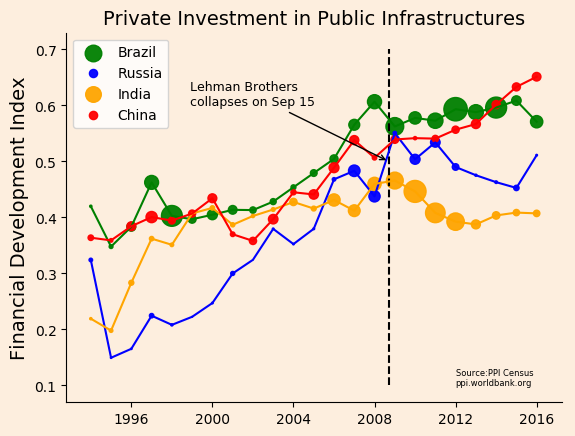

In [701]:
fig, ax = plt.subplots()
dfR = final_table.loc['Russian Federation']
dfI = final_table.loc['India']
dfC = final_table.loc['China']

background = tuple(np.array([253, 238, 222]) / 255)
fig.set_facecolor(background)
ax.set_facecolor(background)


ax.scatter(x = dfB.index, y = dfB.Development, s = dfB.TotalInvestment/200, 
            alpha=0.95, color ="green",
           label = "Brazil")

ax.scatter(x = dfR.index, y = dfR.Development, 
            s = dfR.TotalInvestment/200, alpha=0.95, 
            color ="blue", label = "Russia")

ax.scatter(x = dfI.index, y = dfI.Development, 
            s = dfI.TotalInvestment/200, alpha=0.95, 
            color ="orange", label = "India")

ax.scatter(x = dfC.index, y = dfC.Development, 
            s = dfC.TotalInvestment/200, alpha=0.95, 
            color ="red", label = "China")

ax.plot(dfB.index, dfB.Development,
       color ="green", label='_nolegend_')
ax.plot(dfR.index, dfR.Development,
       color ="blue", label='_nolegend_')
ax.plot(dfI.index, dfI.Development,
       color ="orange", label='_nolegend_')
ax.plot(dfC.index, dfC.Development,
       color ="red", label='_nolegend_')


ax.legend(loc='best')

ax.set_title("Private Investment in Public Infrastructures", fontsize = 14)
ax.set_ylabel("Financial Development Index", fontsize = 14) 

ax.vlines(dt(2008,9,15),0.1,0.7, linestyle = '--')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.annotate(
    "Lehman Brothers \ncollapses on Sep 15", 
    xy=(dt(2008,9,15), 0.5), xycoords='data',  
    xytext=(dt(1998,12,1), 0.6), textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
     fontsize=9
            )

ax.text(dt(2012,1,1),0.1, 
        "Source:PPI Census\nppi.worldbank.org", fontsize = 6)

plt.savefig("Privatizing Infrastructures", dip = 3600)

plt.show()

Several interesting observations from the above plot:
1. development of domestic financial environment, as measured by the financial development index, stalls or even contracts since post-2008
2. the above observation does not apply to China
3. Russian and Chinese public infrastructures are least privatized; volume of investment is shown by the size of the bubbles
